## 11.8. RMSProp算法

### 11.8.1. 算法

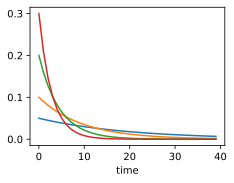

In [1]:
import math
import mindspore
from d2l import mindspore as d2l

d2l.set_figsize()
gammas = [0.95, 0.9, 0.8, 0.7]
for gamma in gammas:
    x = d2l.arange(40).asnumpy()
    d2l.plt.plot(x, (1-gamma) * gamma ** x, label=f'gamma = {gamma:.2f}')
d2l.plt.xlabel('time');

### 11.8.2. 从零开始实现

epoch 20, x1: -0.010599, x2: 0.000000


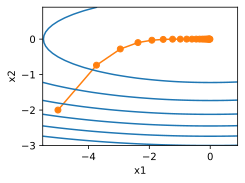

In [2]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [3]:
def init_rmsprop_states(feature_dim):
    s_w = d2l.zeros((feature_dim, 1))
    s_b = d2l.zeros(1)
    return (s_w, s_b)

def rmsprop(params, grads, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s, g in zip(params, states, grads):
        s[:] = gamma * s + (1 - gamma) * d2l.square(g)
        p[:] -= hyperparams['lr']*g / d2l.sqrt(s + eps)

loss: 0.245, 0.217 sec/epoch


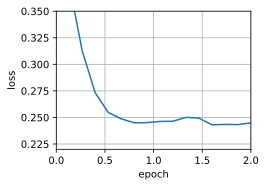

In [4]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(rmsprop, init_rmsprop_states(feature_dim),
               {'lr': 0.01, 'gamma': 0.9}, data_iter, feature_dim);

### 11.8.3. 简洁实现

loss: 0.247, 0.067 sec/epoch


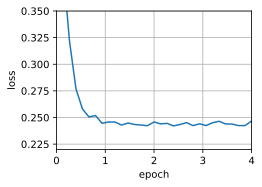

In [5]:
trainer = mindspore.nn.RMSProp
d2l.train_concise_ch11(trainer, {'learning_rate': 0.01, 'decay': 0.9},
                       data_iter)